# Climate Change Analysis

Using **R** and **ggplot2** to create graphics and analyse temperatures in different countries.

In [0]:
# Loading ggplot2
library(ggplot2)

# Loading data
row_data <- read.table("https://github.com/nilsonsales/Climate-Change-Analysis/raw/master/GlobalLandTemperaturesByCountry.csv", quote="", header=TRUE, sep=",")

# Turning warnings off
options(warn=-1)

In [2]:
# Cleaning and adjusting our data set

# Removing the empty lines
temperature <- row_data[complete.cases(row_data),]

# Converting dates to the specific date type
temperature$dt <- as.Date(temperature$dt, format="%Y-%m-%d")

# Taking a look at our data
head(temperature)
tail(temperature)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1,1743-11-01,4.384,2.294,Åland
6,1744-04-01,1.530,4.680,Åland
7,1744-05-01,6.702,1.789,Åland
8,1744-06-01,11.609,1.577,Åland
9,1744-07-01,15.342,1.410,Åland
11,1744-09-01,11.702,1.517,Åland


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577454,2013-03-01,23.226,0.564,Zimbabwe
577455,2013-04-01,21.142,0.495,Zimbabwe
577456,2013-05-01,19.059,1.022,Zimbabwe
577457,2013-06-01,17.613,0.473,Zimbabwe
577458,2013-07-01,17.000,0.453,Zimbabwe
577459,2013-08-01,19.759,0.717,Zimbabwe


## Creating funtions

In [0]:
# Generating title with initial and last years
generate_title <- function(dataset, country){

  firstYear <- format(dataset$dt[1], "%Y")
  lastYear <- format(dataset$dt[length(dataset$dt)], "%Y")

  title <- paste(country, " Average Temperature ", firstYear,"-", lastYear, sep="")
}


# Generating a plot with dots and a smooth line
generate_plot <- function(dataset, high_gradient="red"){
  ggplot(data = dataset) + 
    geom_point(mapping =  aes(x = dt, y = AverageTemperature, colour=AverageTemperature)) +
    geom_smooth(mapping = aes(x = dt, y = AverageTemperature), method = 'loess') +
    scale_color_gradient(low="blue", high=high_gradient) +
    xlab("Year") + ylab("Temperature (°C)") +
    labs(colour = "Temp")
  
}

## Analysing Brazil, United States, United Kigdom, Japan and South Africa's temperatures

### ● Brazil

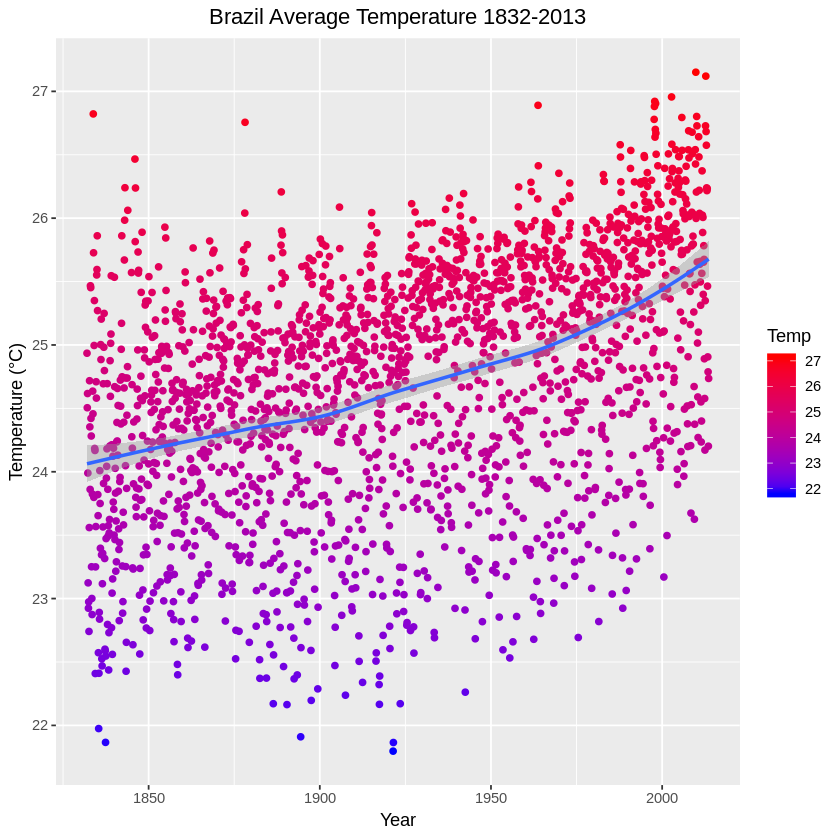

In [4]:
## Brazil
tempBrazil <- temperature[ which(temperature$Country=="Brazil"),]


# Creating a title with initial and last years available
title <- generate_title(tempBrazil, "Brazil")

# Creating and saving our plot
BrazilPlot <- generate_plot(tempBrazil) +
   ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))

# Showing our plot
print(BrazilPlot)

We have too much data together. Let's now filter our data and get the average temperature by year to see how the graphic looks like.

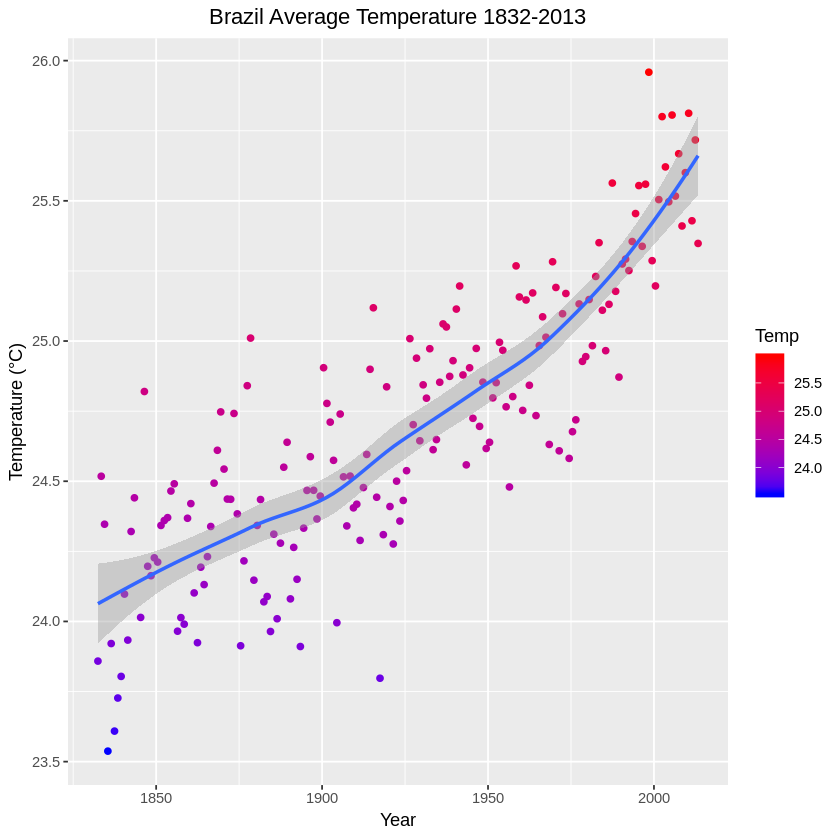

In [5]:
# Aggregating the data by year
tempBrazil <- aggregate(x = tempBrazil, 
                        by = list(year = substr(tempBrazil$dt, 1, 4)),
                        FUN = mean)

# Generating the new plot
brazilPlot <- generate_plot(tempBrazil) +
  ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))


print(brazilPlot)

### ● United States

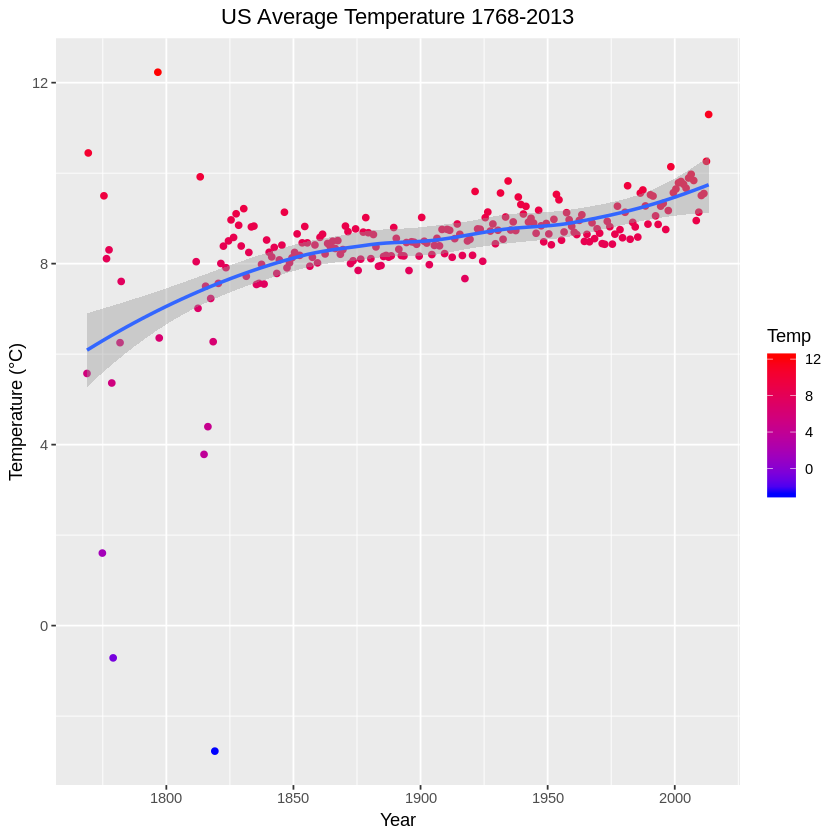

In [6]:
## United States
tempUS = temperature[ which(temperature$Country=="United States"),]


title = generate_title(tempUS, "US")


#Aggregating the data by year
tempUS <- aggregate(x = tempUS, 
                    by = list(year = substr(tempUS$dt, 1, 4)),
                    FUN = mean)

US_Plot <- generate_plot(tempUS) +
  ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))

print(US_Plot)

We can see that we have some strange values there; it's really unlikely that the average temperature in the US was negative. Let's remove them calculating which values are outliers.

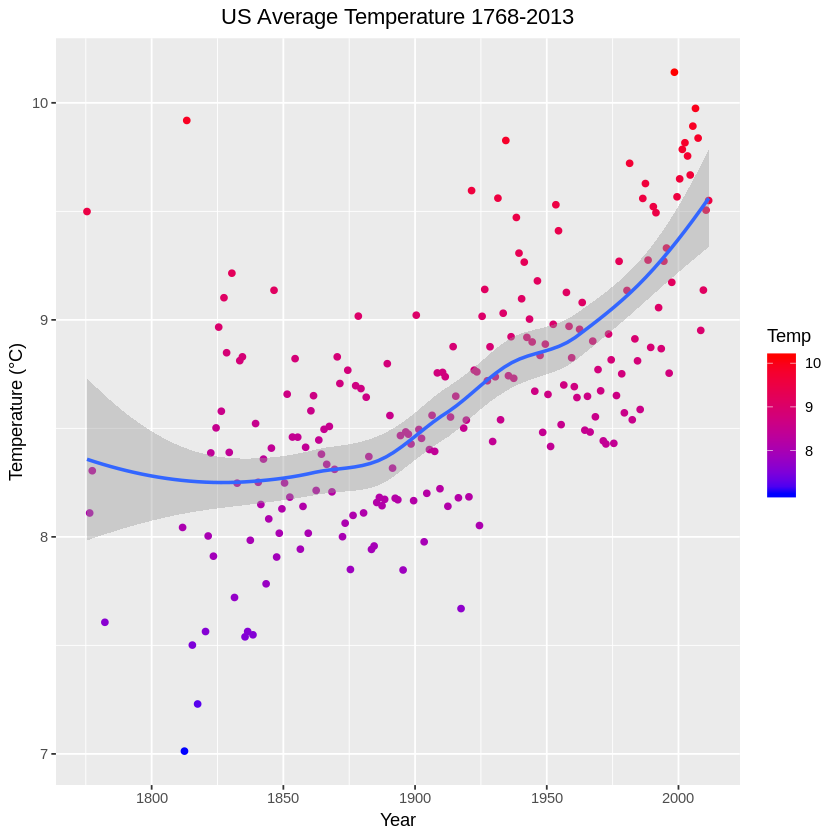

In [7]:
# Removing the outliers
lowerWhisker <- boxplot(tempUS[3], plot=FALSE)$stats[c(1, 5), ][1]
upperWhisker <- boxplot(tempUS[3], plot=FALSE)$stats[c(1, 5), ][2]

tempUS = tempUS[ which(tempUS$AverageTemperature >=  lowerWhisker & tempUS$AverageTemperature <= upperWhisker),]


# Generating and ploting again
US_Plot <- generate_plot(tempUS) +
  ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))

print(US_Plot)

### ● United Kingdom

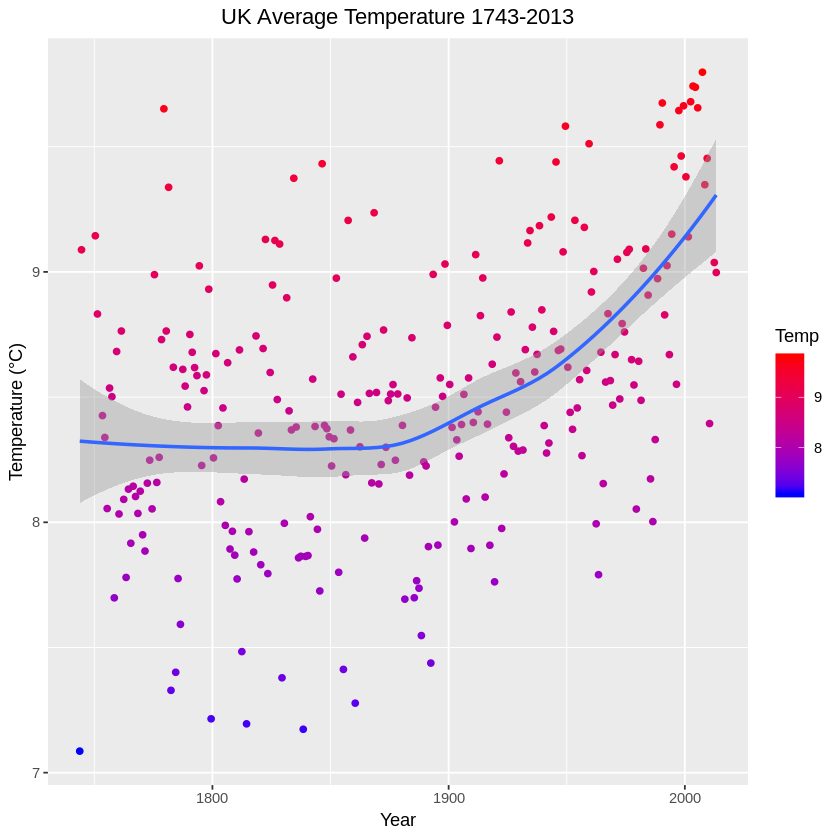

In [8]:
## United Kingdom
tempUK = temperature[ which(temperature$Country=="United Kingdom"),]


# Generating title with initial and last years
title <- generate_title(tempUK, "UK")

# Aggregating the data by year
tempUK <- aggregate(x = tempUK, 
                    by = list(year = substr(tempUK$dt, 1, 4)),
                    FUN = mean)

# Removing the outliers
lowerWhisker <- boxplot(tempUK[3], plot=FALSE)$stats[c(1, 5), ][1]
upperWhisker <- boxplot(tempUK[3], plot=FALSE)$stats[c(1, 5), ][2]

tempUK = tempUK[ which(tempUK$AverageTemperature >=  lowerWhisker & tempUK$AverageTemperature <= upperWhisker),]


UK_Plot <- generate_plot(tempUK) +
  ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))

print(UK_Plot)

### ● Japan

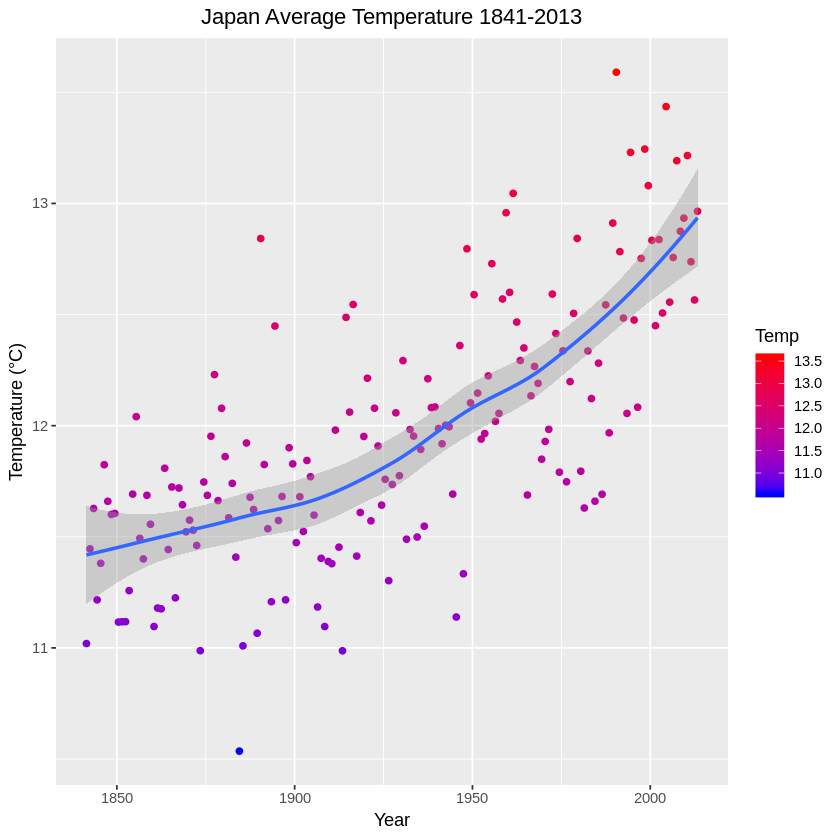

In [9]:
## Japan
tempJapan = temperature[ which(temperature$Country=="Japan"),]


# Generating title with initial and last years
title <- generate_title(tempJapan, "Japan")


# Aggregating the data by year
tempJapan <- aggregate(x = tempJapan, 
                       by = list(year = substr(tempJapan$dt, 1, 4)),
                       FUN = mean)

japanPlot <- generate_plot(tempJapan) +
  ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))

print(japanPlot)

### ● South Africa

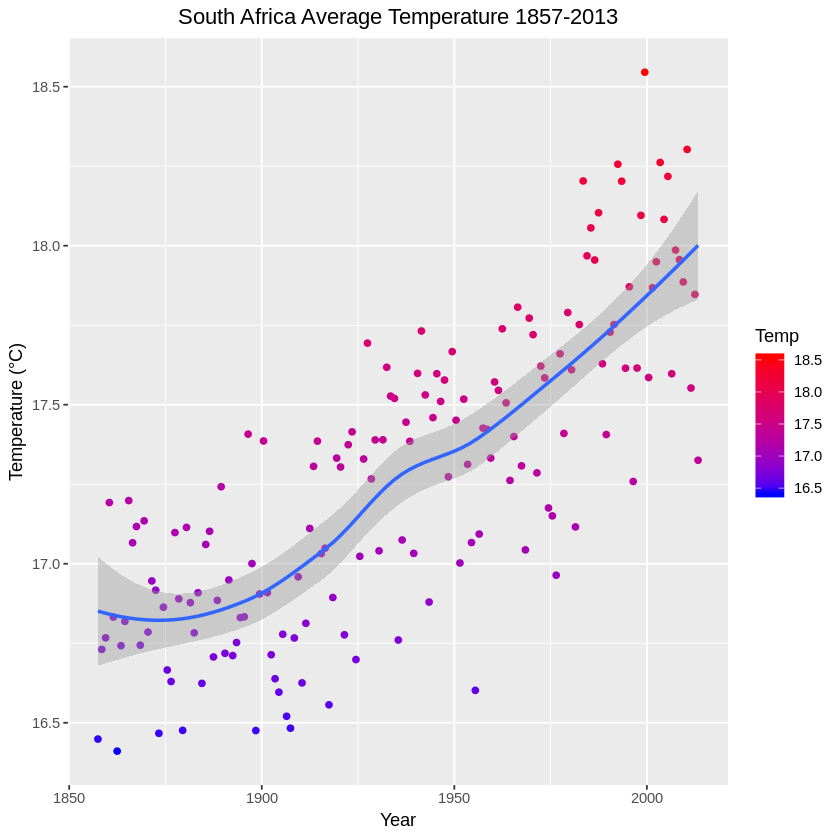

In [10]:
## South Africa
tempSA = temperature[ which(temperature$Country=="South Africa"),]


# Generating title with initial and last years
title <- generate_title(tempSA, "South Africa")


# Agreggating the data by year
tempSA <- aggregate(x = tempSA, 
                    by = list(year = substr(tempSA$dt, 1, 4)),
                    FUN = mean)

SA_Plot <- generate_plot(tempSA) +
  ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))

print(SA_Plot)

## Looking at the temperatures by season
In some cases, the average temperature doesn't reflect a country's temperature. A more realistic way of seeing the change in temperature along the years is looking at it by season. Let's choose **Brazil** and **UK**. These two countries have two main differences in weather: Brazil doesn't have very well-defined seasons and is located in the Southern hemisphere. The UK, on the other hand, has well-defined seasons and is in located in the Northern hemisphere.

### Multiplot function
First of all, let's define a function to plot the graphics of our 4 seasons at once.

In [0]:
# Defining multiplot
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  require(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

### ● Brazil

Loading required package: grid


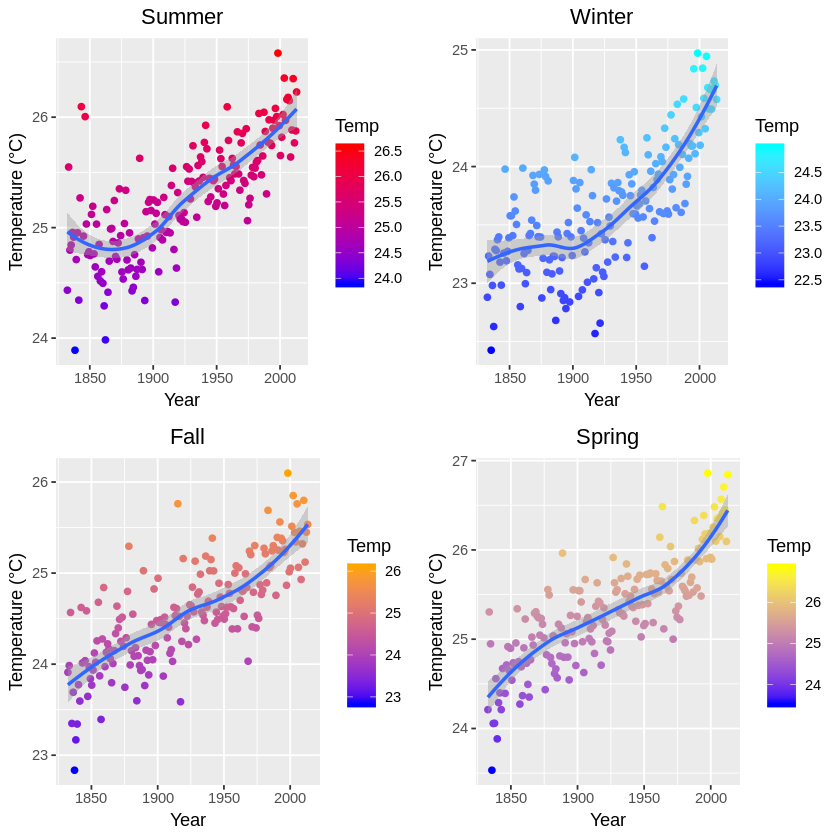

In [12]:
## Brazil

# Reload the full dataset
tempBrazil <- temperature[ which(temperature$Country=="Brazil"),]

# Creating subsets with the seasons
summer <- tempBrazil[ which( as.numeric(format(tempBrazil$dt, "%m")) == 12 | as.numeric(format(tempBrazil$dt, "%m")) <= 2 ),]
summer <- aggregate(x = summer, 
                    by = list(year = substr(summer$dt, 1, 4)),
                    FUN = mean)

fall <- tempBrazil[ which( as.numeric(format(tempBrazil$dt, "%m")) > 2 & as.numeric(format(tempBrazil$dt, "%m")) <= 5 ),]
fall <- aggregate(x = fall, 
                  by = list(year = substr(fall$dt, 1, 4)),
                  FUN = mean)

winter <- tempBrazil[ which( as.numeric(format(tempBrazil$dt, "%m")) > 5 & as.numeric(format(tempBrazil$dt, "%m")) <= 8 ),]
winter <- aggregate(x = winter, 
                    by = list(year = substr(winter$dt, 1, 4)),
                    FUN = mean)

spring <- tempBrazil[ which( as.numeric(format(tempBrazil$dt, "%m")) > 8 & as.numeric(format(tempBrazil$dt, "%m")) <= 11 ),]
spring <- aggregate(x = spring, 
                    by = list(year = substr(spring$dt, 1, 4)),
                    FUN = mean)


# Saving plots
p1 <- generate_plot(summer) +
  ggtitle("Summer") + theme(plot.title = element_text(hjust = 0.5))

p2 <- generate_plot(fall, "orange") +
  ggtitle("Fall") + theme(plot.title = element_text(hjust = 0.5))

p3 <- generate_plot(winter, "cyan1") +
  ggtitle("Winter") + theme(plot.title = element_text(hjust = 0.5))

p4 <- generate_plot(spring, "yellow") +
  ggtitle("Spring") + theme(plot.title = element_text(hjust = 0.5))

# Plotting
multiplot(p1, p2, p3, p4, cols=2)

### ● United Kingdom

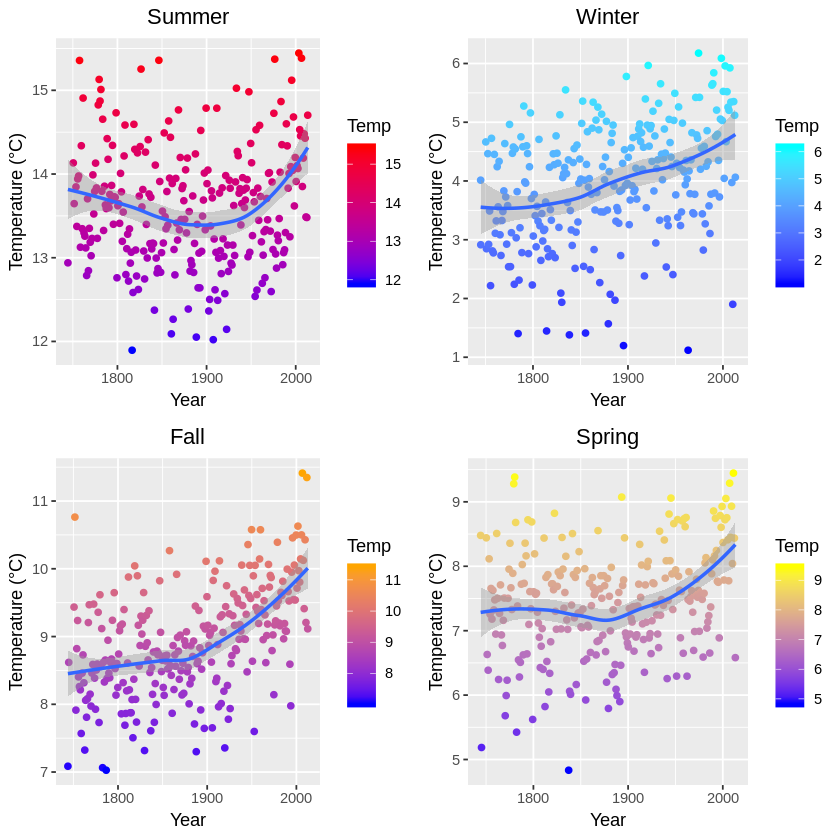

In [13]:
## United Kingdom

#Reload the full dataset
tempUK <- temperature[ which(temperature$Country=="United Kingdom"),]

# Cleaning the old variables
rm(summer, fall, winter, spring)

# Creating subsets with the seasons
winter <- tempUK[ which( as.numeric(format(tempUK$dt, "%m")) == 12 | as.numeric(format(tempUK$dt, "%m")) <= 2 ),]
winter <- aggregate(x = winter, 
                    by = list(year = substr(winter$dt, 1, 4)),
                    FUN = mean)

spring <- tempUK[ which( as.numeric(format(tempUK$dt, "%m")) > 2 & as.numeric(format(tempUK$dt, "%m")) <= 5 ),]
spring <- aggregate(x = spring, 
                    by = list(year = substr(spring$dt, 1, 4)),
                    FUN = mean)

summer <- tempUK[ which( as.numeric(format(tempUK$dt, "%m")) > 5 & as.numeric(format(tempUK$dt, "%m")) <= 8 ),]
summer <- aggregate(x = summer, 
                    by = list(year = substr(summer$dt, 1, 4)),
                    FUN = mean)

fall <- tempUK[ which( as.numeric(format(tempUK$dt, "%m")) > 8 & as.numeric(format(tempUK$dt, "%m")) <= 11 ),]
fall <- aggregate(x = fall, 
                    by = list(year = substr(fall$dt, 1, 4)),
                    FUN = mean)


# Saving plots
p1 <- generate_plot(summer) +
  ggtitle("Summer") + theme(plot.title = element_text(hjust = 0.5))

p2 <- generate_plot(fall, "orange") +
  ggtitle("Fall") + theme(plot.title = element_text(hjust = 0.5))

p3 <- generate_plot(winter, "cyan1") +
  ggtitle("Winter") + theme(plot.title = element_text(hjust = 0.5))

p4 <- generate_plot(spring, "yellow") +
  ggtitle("Spring") + theme(plot.title = element_text(hjust = 0.5))


# Plotting
multiplot(p1, p2, p3, p4, cols=2)